In [ ]:
#naive bayes

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.naive_bayes import GaussianNB


In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')
print(df.head())

   region  danceability  energy  key  loudness  mode  speechiness  \
0       3         0.685   0.644   10   -13.206     0       0.1550   
1       3         0.752   0.620    5    -5.536     1       0.0509   
2       1         0.748   0.627    7    -6.029     1       0.0639   
3       2         0.748   0.627    7    -6.029     1       0.0639   
4       3         0.748   0.627    7    -6.029     1       0.0639   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.302          0.000055    0.1140    0.808  164.919       169379   
1         0.309          0.000000    0.0750    0.962  117.399       164459   
2         0.131          0.000000    0.0852    0.524  120.963       188491   
3         0.131          0.000000    0.0852    0.524  120.963       188491   
4         0.131          0.000000    0.0852    0.524  120.963       188491   

   time_signature  popular  
0               4        0  
1               4        0  
2               4        0  


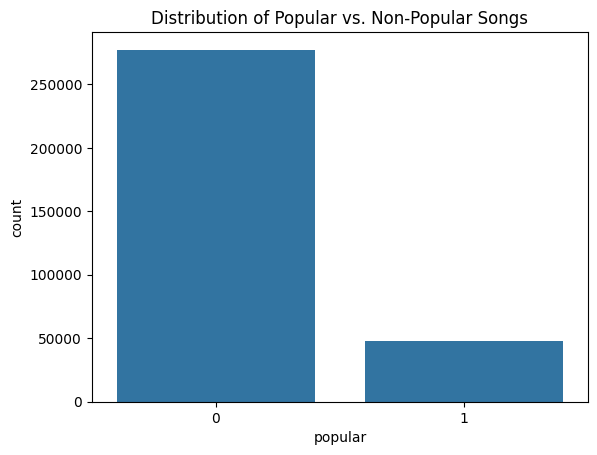

In [3]:

sns.countplot(x='popular', data=df)
plt.title('Distribution of Popular vs. Non-Popular Songs')
plt.show()


In [4]:
#Split the data into features and target variable
X = df.drop(columns=['popular'])  # Features
y = df['popular']  # Target variable

In [5]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
nb_model = GaussianNB()

In [8]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred = nb_model.predict(X_test)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8506


In [11]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     55340
           1       0.18      0.00      0.01      9613

    accuracy                           0.85     64953
   macro avg       0.51      0.50      0.46     64953
weighted avg       0.75      0.85      0.78     64953



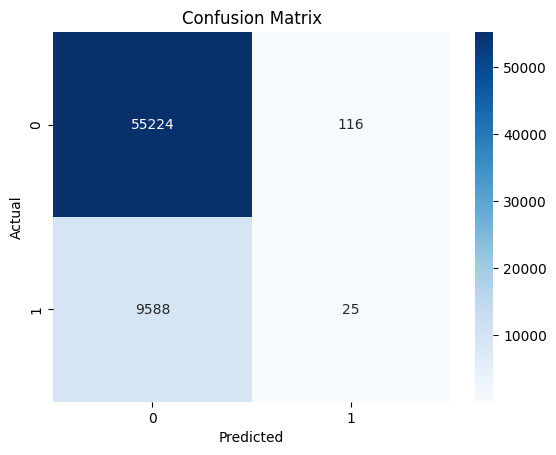

In [12]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Analyzing for region: 3
Region 3 - Accuracy: 0.8161
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      6212
           1       0.08      0.00      0.00      1361

    accuracy                           0.82      7573
   macro avg       0.45      0.50      0.45      7573
weighted avg       0.69      0.82      0.74      7573



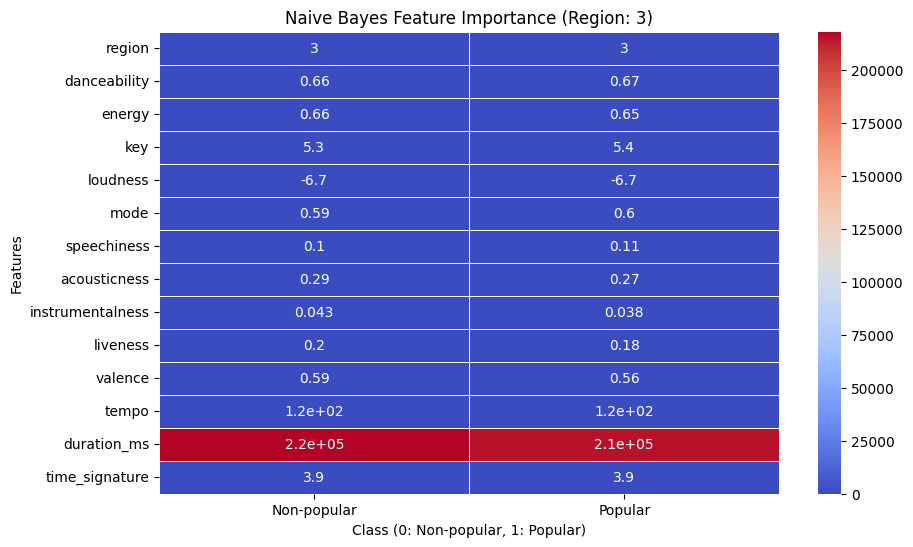


Analyzing for region: 1
Region 1 - Accuracy: 0.8762
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      5073
           1       0.00      0.00      0.00       704

    accuracy                           0.88      5777
   macro avg       0.44      0.50      0.47      5777
weighted avg       0.77      0.88      0.82      5777



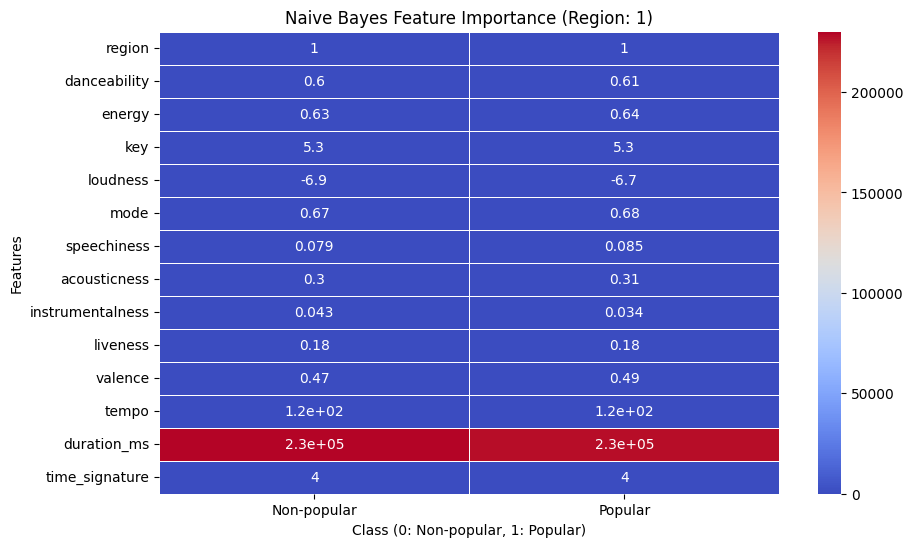


Analyzing for region: 2
Region 2 - Accuracy: 0.8095
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      6103
           1       0.00      0.00      0.00      1436

    accuracy                           0.81      7539
   macro avg       0.40      0.50      0.45      7539
weighted avg       0.66      0.81      0.72      7539



c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


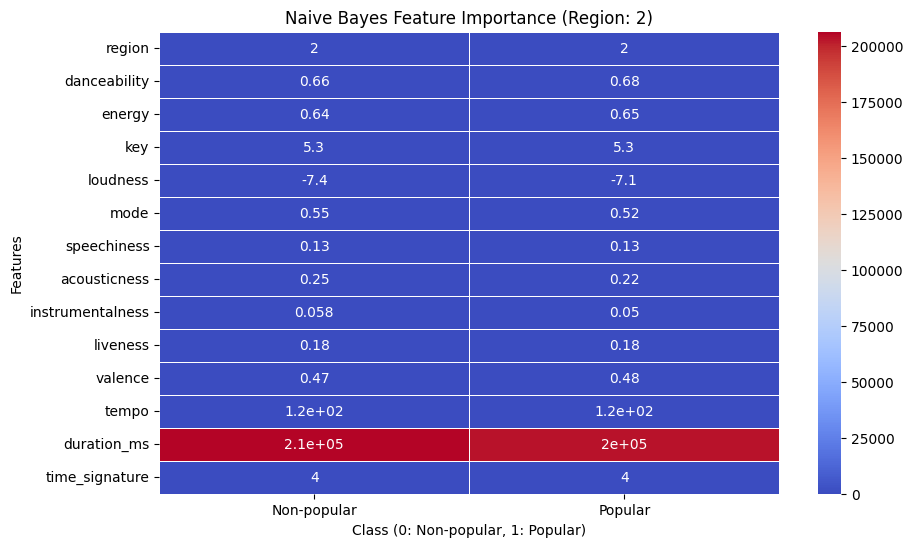


Analyzing for region: 4
Region 4 - Accuracy: 0.8456
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2406
           1       0.25      0.00      0.00       437

    accuracy                           0.85      2843
   macro avg       0.55      0.50      0.46      2843
weighted avg       0.75      0.85      0.78      2843



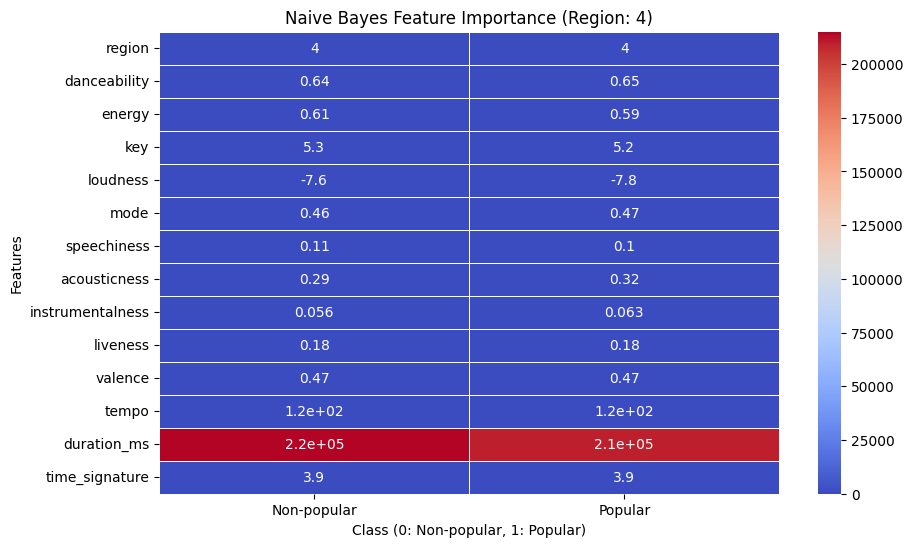


Analyzing for region: 5
Region 5 - Accuracy: 0.8596
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3139
           1       0.23      0.01      0.03       494

    accuracy                           0.86      3633
   macro avg       0.55      0.50      0.48      3633
weighted avg       0.78      0.86      0.80      3633



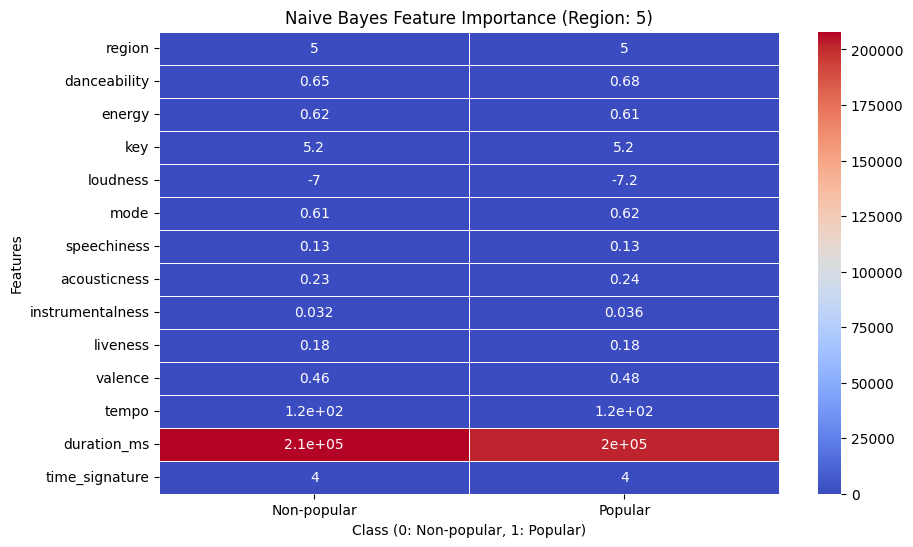


Analyzing for region: 6
Region 6 - Accuracy: 0.8739
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      7229
           1       0.11      0.00      0.01      1009

    accuracy                           0.87      8238
   macro avg       0.49      0.50      0.47      8238
weighted avg       0.78      0.87      0.82      8238



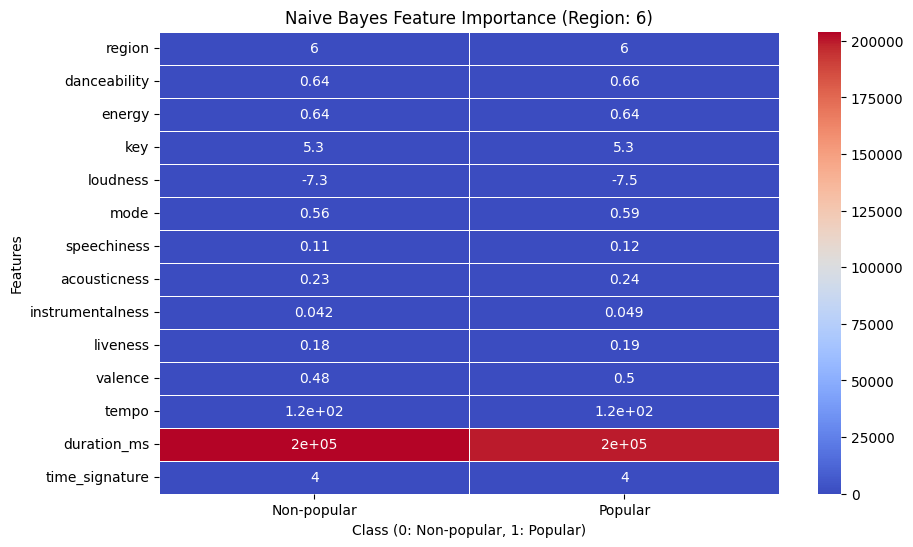


Analyzing for region: 7
Region 7 - Accuracy: 0.8349
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2456
           1       0.17      0.00      0.00       481

    accuracy                           0.83      2937
   macro avg       0.50      0.50      0.46      2937
weighted avg       0.73      0.83      0.76      2937



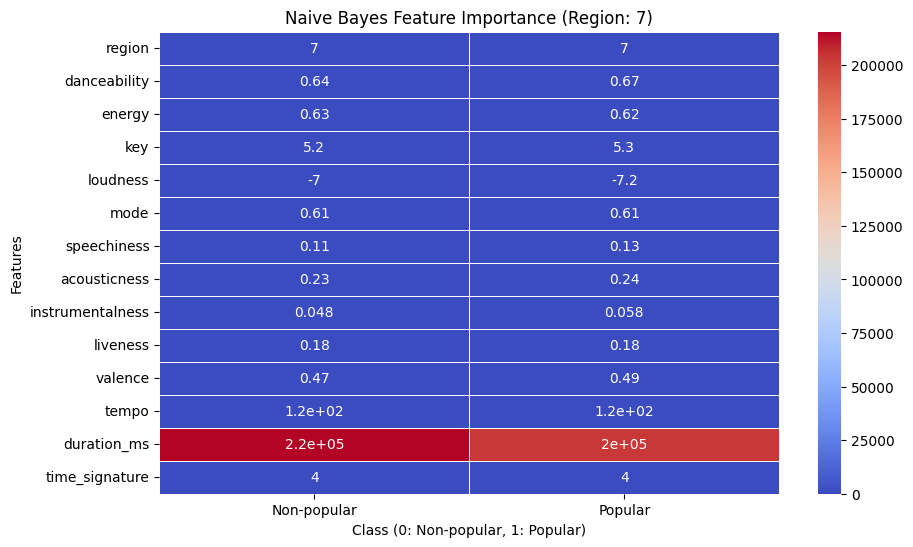


Analyzing for region: 8
Region 8 - Accuracy: 0.8050
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4467
           1       0.67      0.00      0.00      1083

    accuracy                           0.81      5550
   macro avg       0.74      0.50      0.45      5550
weighted avg       0.78      0.81      0.72      5550



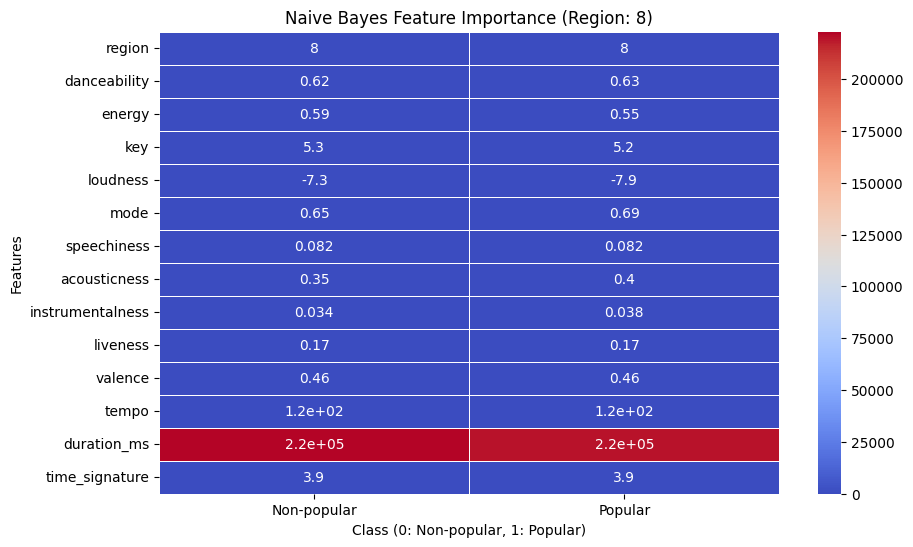


Analyzing for region: 9
Region 9 - Accuracy: 0.8748
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      5976
           1       0.14      0.00      0.01       838

    accuracy                           0.87      6814
   macro avg       0.51      0.50      0.47      6814
weighted avg       0.79      0.87      0.82      6814



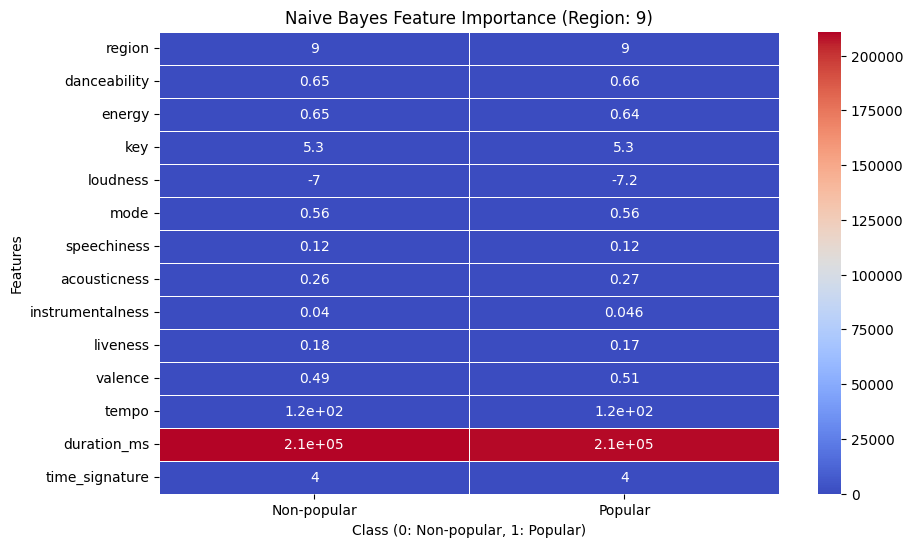


Analyzing for region: 10
Region 10 - Accuracy: 0.8779
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     10080
           1       0.17      0.01      0.01      1358

    accuracy                           0.88     11438
   macro avg       0.53      0.50      0.47     11438
weighted avg       0.80      0.88      0.83     11438



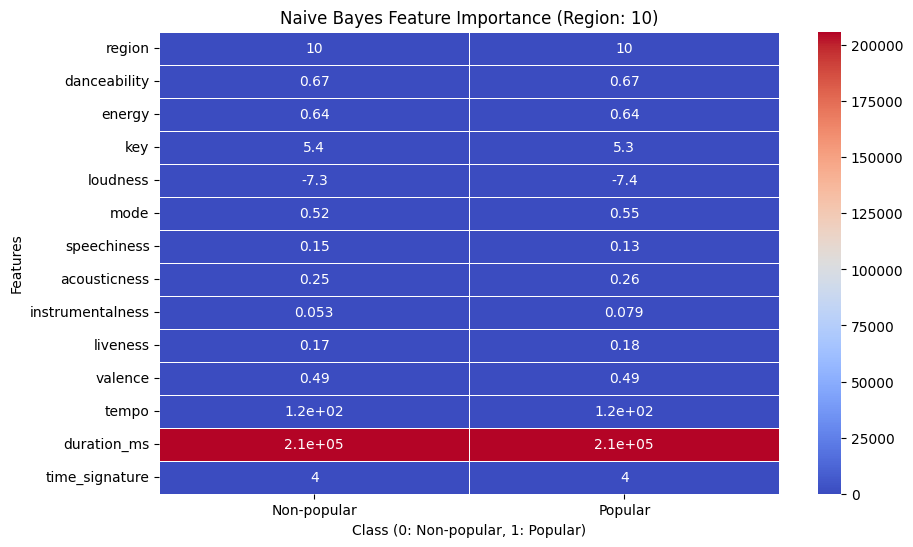


Analyzing for region: 0
Region 0 - Accuracy: 0.8405
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2198
           1       0.00      0.00      0.00       417

    accuracy                           0.84      2615
   macro avg       0.42      0.50      0.46      2615
weighted avg       0.71      0.84      0.77      2615



c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


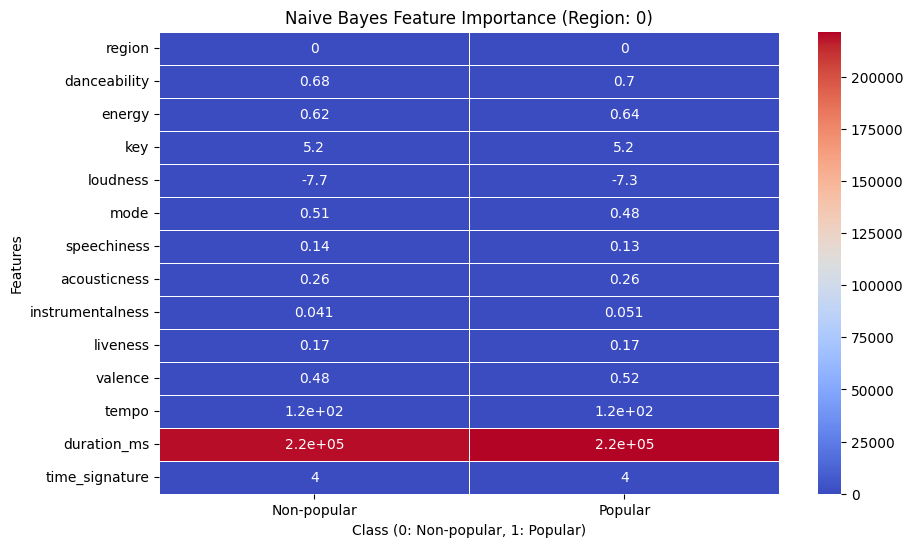

In [15]:
# Feature analysis per region
regions = df['region'].unique()
for region in regions:
    print(f'\nAnalyzing for region: {region}')
    
    # Filter dataset for specific region
    region_data = df[df['region'] == region]
    X_region = region_data[X.columns]
    y_region = region_data['popular']

    # Split region data into train and test sets
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_region, y_region, test_size=0.2, random_state=42)

    # Train Naive Bayes model for this region
    nb_model.fit(X_train_r, y_train_r)
    
    # Predict and evaluate for this region
    y_pred_r = nb_model.predict(X_test_r)
    region_accuracy = accuracy_score(y_test_r, y_pred_r)
    print(f'Region {region} - Accuracy: {region_accuracy:.4f}')
    
    # Classification report for region
    print("Classification Report:")
    print(classification_report(y_test_r, y_pred_r))

    # Feature importance analysis for this region
    region_log_probs = nb_model.theta_
    feature_importances_region = pd.DataFrame(data=region_log_probs, columns=X.columns, index=['Non-popular', 'Popular'])
    
    # Visualizing feature importance for the region
    plt.figure(figsize=(10, 6))
    sns.heatmap(feature_importances_region.T, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Naive Bayes Feature Importance (Region: {region})')
    plt.ylabel('Features')
    plt.xlabel('Class (0: Non-popular, 1: Popular)')
    plt.show()

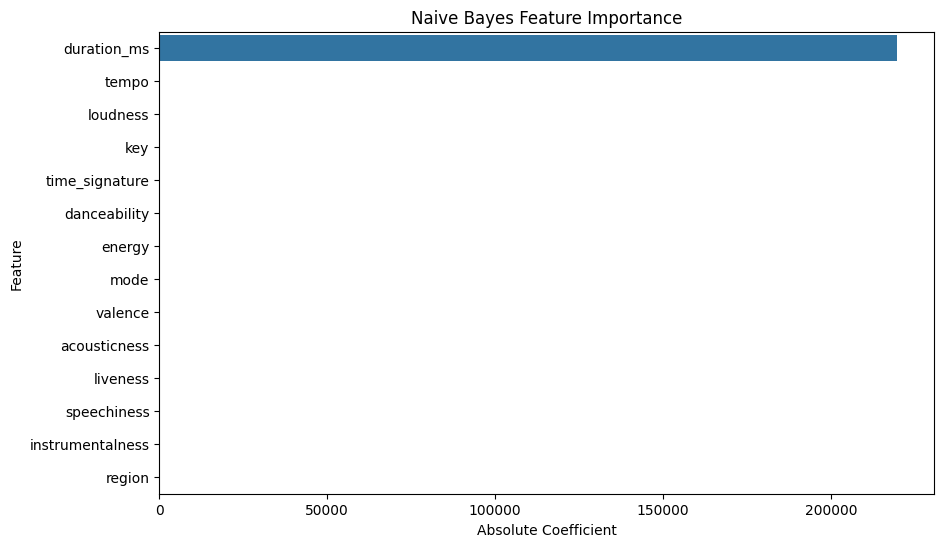

In [21]:
#get the coefficients
coefficients = nb_model.theta_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Coefficients': coefficients[0], 'Popular': coefficients[1]})

#sort by absolute value of coefficients
feature_importances['Absolute Coefficient'] = feature_importances['Coefficients'].abs()
feature_importances = feature_importances.sort_values(by='Absolute Coefficient', ascending=False)

#plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importances)
plt.title('Naive Bayes Feature Importance')
plt.show()

In [22]:
# Create a dictionary to map region codes to region names
region_names = {
    0: 'Africa',
    1: 'East Asia',
    2: 'Eastern Europe',
    3: 'Latin America',
    4: 'Middle East',
    5: 'North America',
    6: 'Northern Europe',
    7: 'Oceania',
    8: 'South Asia',
    9: 'Southern Europe',
    10: 'Western Europe'
}

# Get the unique regions from your dataset
regions = df['region'].unique()


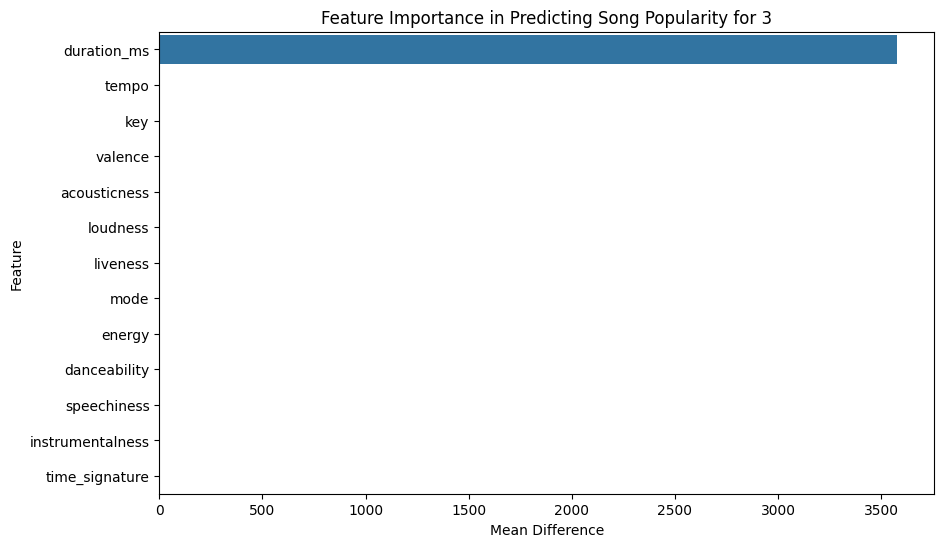

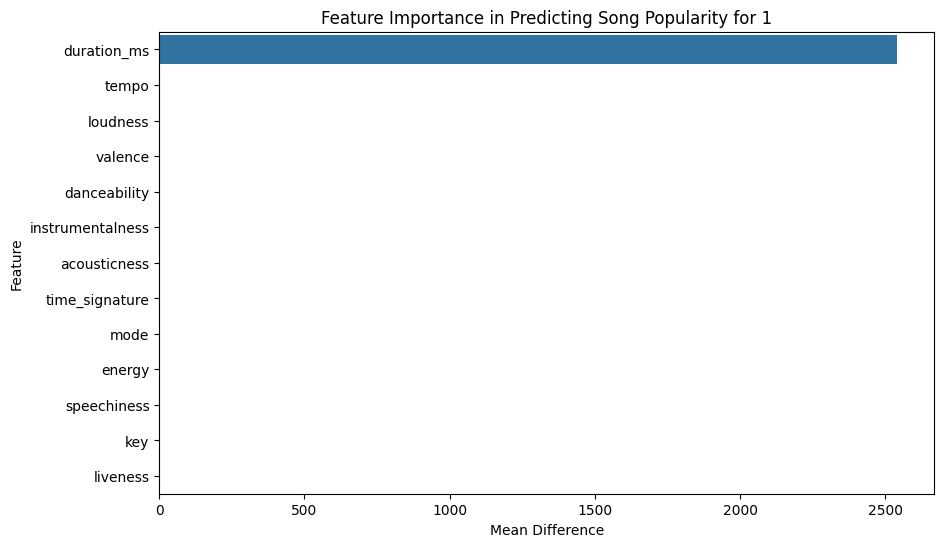

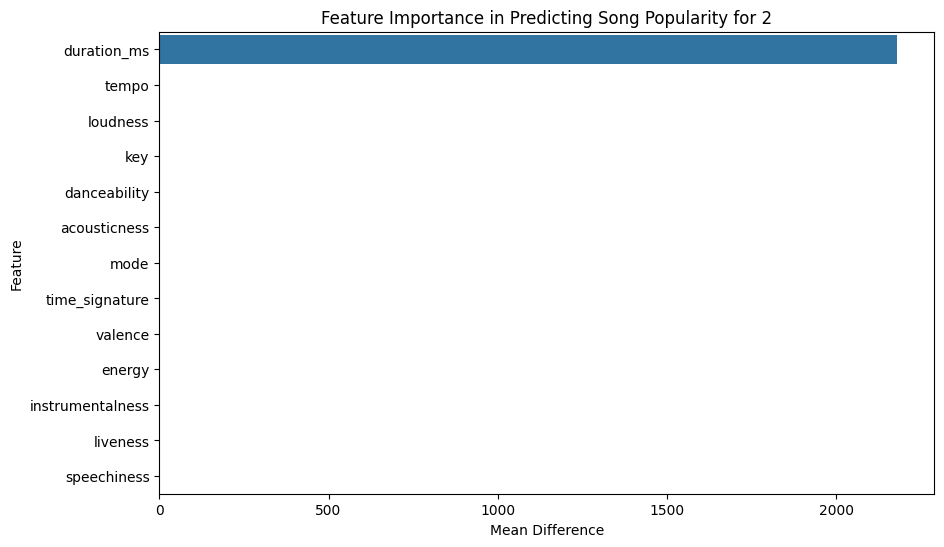

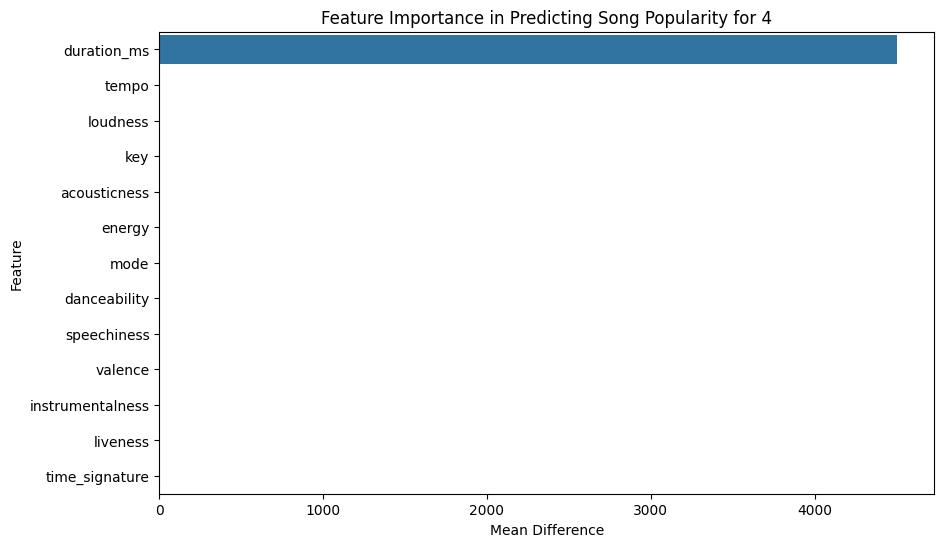

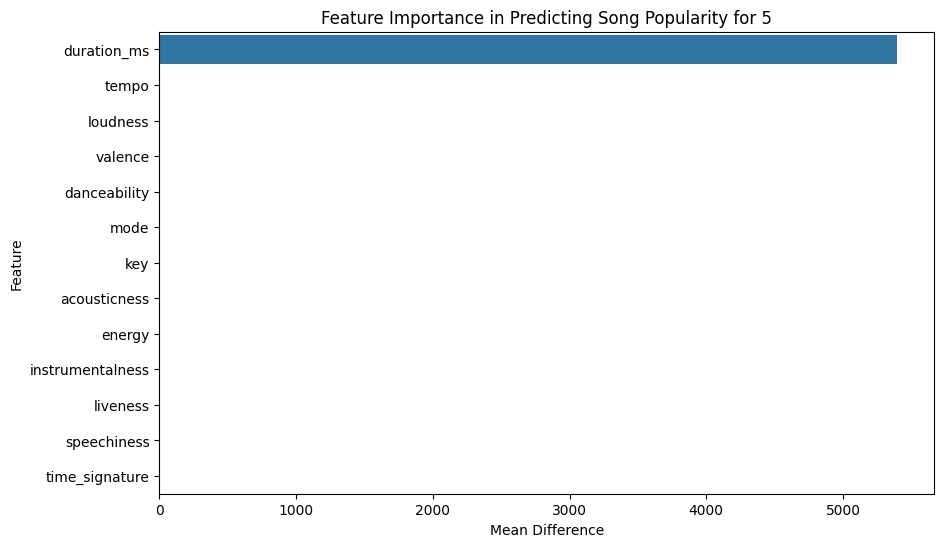

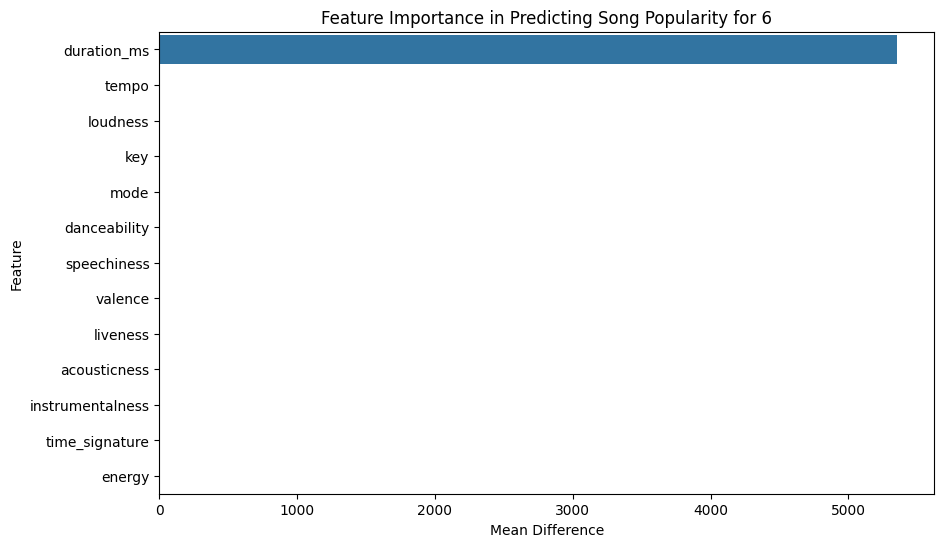

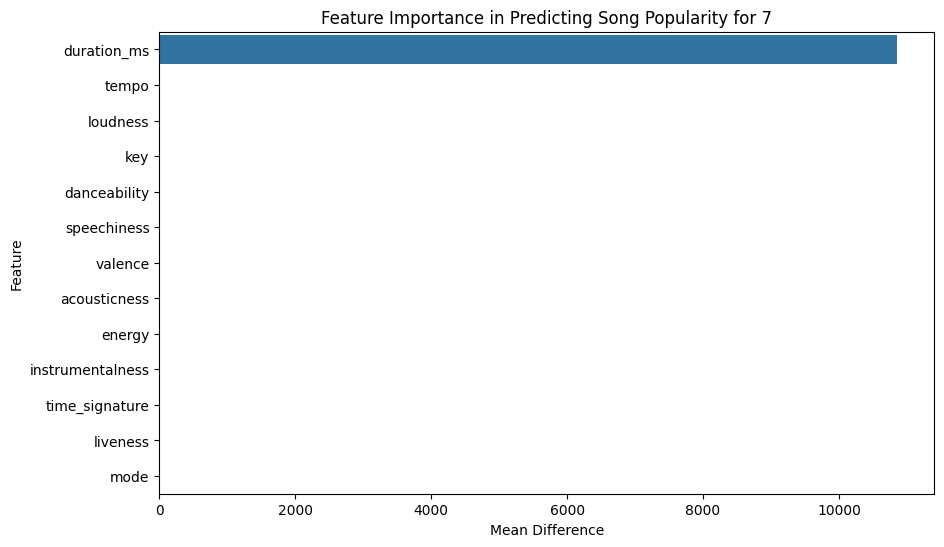

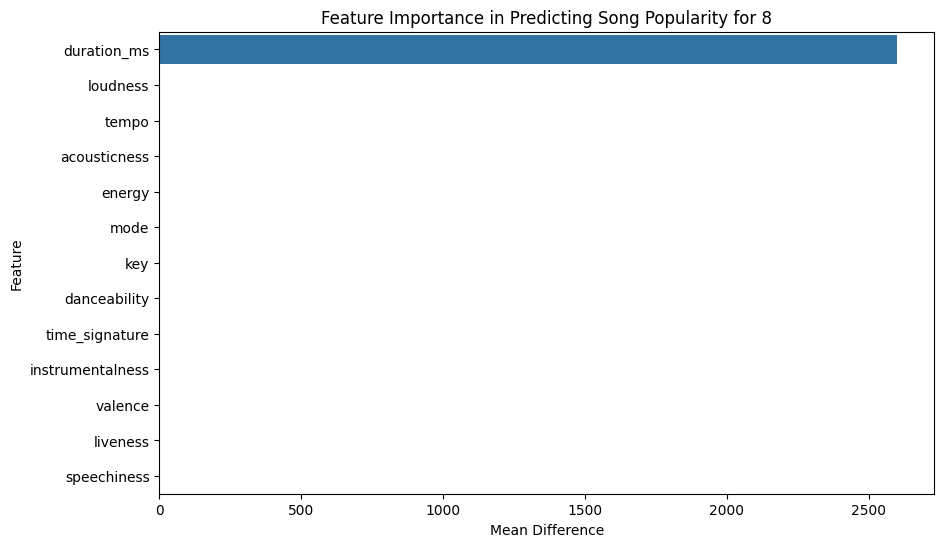

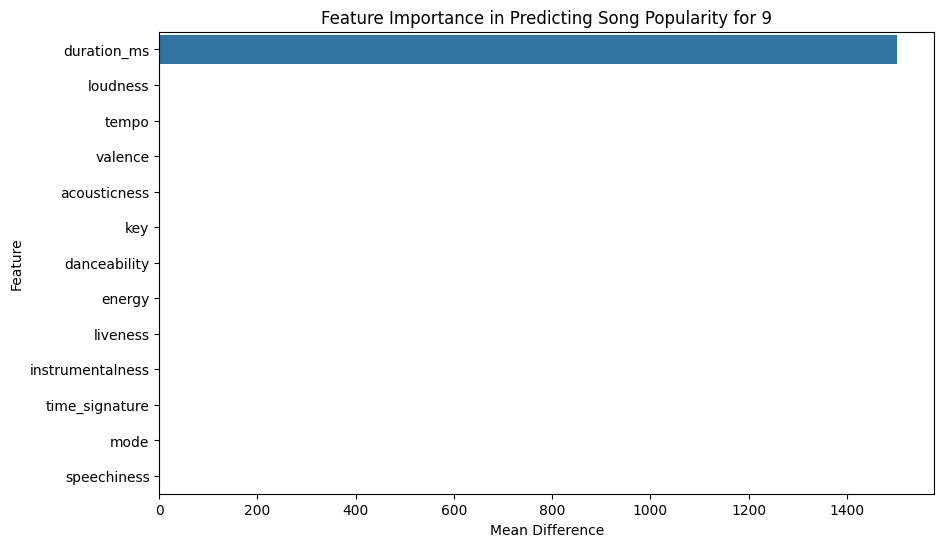

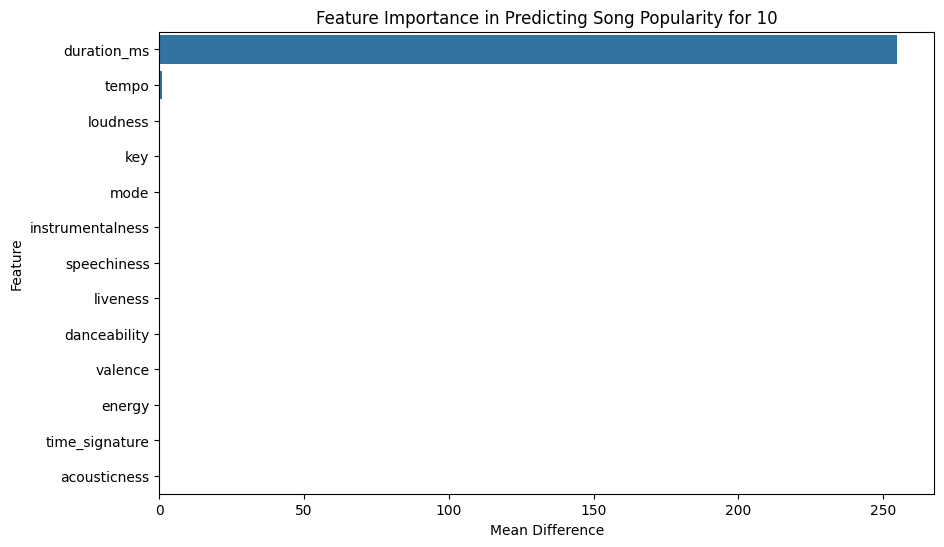

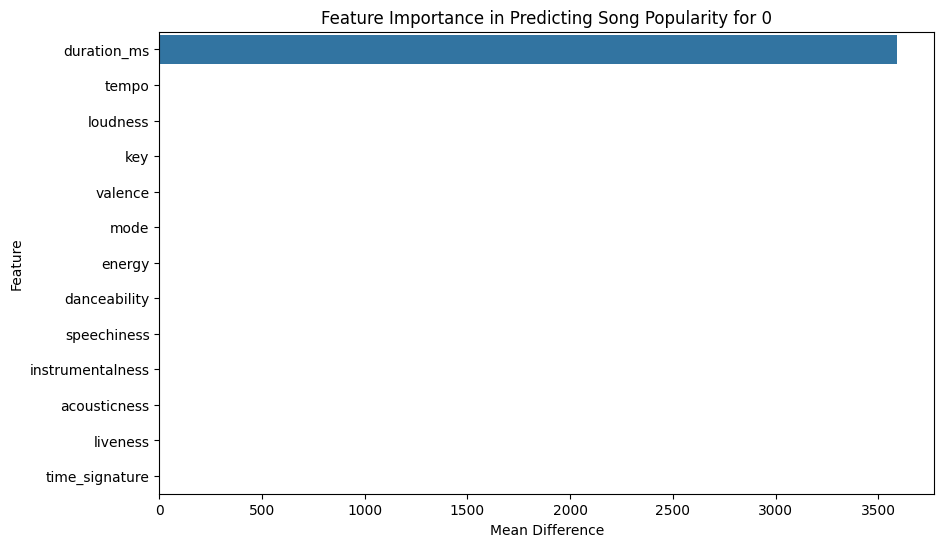

In [25]:
#feautre importance for each region seperately
for region in regions: 
    region_data = df[df['region'] == region]

    X_region = region_data.drop(['popular', 'region'], axis=1)
    y_region = region_data['popular']

    #train a model for this region
    nb_model.fit(X_region, y_region)

    #get the feautre importances
    feature_importances_region = nb_model.theta_

    #create data frame for feature importances
    feature_importance = pd.DataFrame({
        'Feature': X_region.columns,
        'Coefficients': feature_importances_region[0],
    })

    #sort by absolute value of coefficients
    feature_importance['Absolute Coefficient'] = feature_importance['Coefficients'].abs()
    feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance in Predicting Song Popularity for {region_names[region]}')
    plt.show()